#**Иерархия предикторов ожирения: отчет по исследовательскому анализу данных (EDA)**

In [2]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [5]:
import pandas as pd
from ydata_profiling import ProfileReport

# 1. Загрузка файла train.csv
df_train = pd.read_csv("train.csv")

# 2. Генерация отчёта
profile = ProfileReport(
    df_train,
    title="EDA Отчет (train.csv)",
    explorative=True
)

# 3. Вывод отчета на экран (в виде интерактивного виджета)
profile


Output hidden; open in https://colab.research.google.com to view.

---

# Отчет о профилировании датасета `train.csv`

## 1. Общая информация о датасете

| Метрика | Значение | Описание |
| :--- | :--- | :--- |
| **Количество строк (Наблюдений)** | 20,758 | Общее число образцов данных (людей). |
| **Количество столбцов (Признаков)** | 18 | Общее число переменных, включая целевую. |
| **Пропущенные значения (Total Missing)** | 0 | **Данные полные.** Пропуски отсутствуют, что упрощает этап предобработки. |
| **Дубликаты строк** | 0 | Дублирующиеся записи отсутствуют. |
| **Объем данных** | $2.84 \text{ MB}$ | Размер файла в памяти. |

---

## 2. Структура и типы данных (Variables)

Датасет содержит смесь числовых, категориальных и бинарных признаков.

| Тип данных | Количество | Примеры столбцов |
| :--- | :--- | :--- |
| **Числовой (Numerical)** | 8 | `id`, `Age`, `Height`, `Weight`, `FCVC`, `NCP`, `CH2O`, `FAF`, `TUE` |
| **Категориальный (Categorical/Text)** | 10 | `Gender`, `family_history_with_overweight`, `FAVC`, `CAEC`, `CALC`, `SMOKE`, `SCC`, `MTRANS`, `NObeyesdad` |
| **Бинарный (Binary)** | 5 | `Gender`, `family_history_with_overweight`, `FAVC`, `SMOKE`, `SCC` (при условии кодирования) |

---

## 3. Статистический анализ числовых признаков

В таблице представлены ключевые описательные статистики для непрерывных и дискретных числовых переменных.

| Признак | Среднее ($\mu$) | Медиана ($\text{P}50$) | Станд. откл. ($\sigma$) | Минимум | Максимум |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Age** | 24.34 | 22.84 | 6.30 | 14.00 | 61.00 |
| **Height** | 1.70 | 1.70 | 0.09 | 1.45 | 1.98 |
| **Weight** | 107.49 | 106.5 | 32.44 | 39.0 | 173.0 |
| **FCVC** | 2.47 | 2.65 | 0.53 | 1.0 | 3.0 |
| **NCP** | 2.70 | 3.0 | 0.70 | 1.0 | 4.0 |
| **FAF** | 1.01 | 1.0 | 0.85 | 0.0 | 3.0 |
| **TUE** | 0.65 | 0.62 | 0.61 | 0.0 | 2.0 |

* **Weight (Вес):** Имеет **высокое стандартное отклонение** (32.44) относительно среднего (107.49), что указывает на широкий разброс веса среди наблюдаемых.
* **Age (Возраст):** Основная часть выборки — **молодые люди**, средний возраст составляет около 24 лет.
* **FCVC & NCP & FAF:** Эти признаки имеют **ограниченный диапазон** (от 1 до 3 или 4), что указывает на их порядковый характер, несмотря на представление в виде чисел с плавающей точкой.

---

## 4. Анализ целевой переменной: `NObeyesdad`

Целевая переменная является **многоклассовой (7 классов)**, что требует использования алгоритмов многоклассовой классификации.

| Категория | Количество | Процент (%) |
| :--- | :--- | :--- |
| **Obesity\_Type\_III** | 4046 | 19.5% |
| **Obesity\_Type\_II** | 2973 | 14.32% |
| **Normal\_Weight** | 2950 | 14.21% |
| **Obesity\_Type\_I** | 2910 | 14.02% |
| **Overweight\_Level\_II** | 2774 | 13.36% |
| **Overweight\_Level\_I** | 2773 | 13.36% |
| **Insufficient\_Weight** | 2332 | 11.24% |

* **Вывод:** Распределение классов **относительно сбалансировано** (нет доминирующего класса с $>50\%$ ), но **Obesity\_Type\_III** является самым крупным классом. Это распределение является благоприятным для обучения классификатора, но может потребовать внимания к метрикам, кроме точности (например, F1-score или Cohen's Kappa).

---

## 5. Анализ ключевых категориальных признаков

| Признак | Самая частая категория | Частота | Комментарий |
| :--- | :--- | :--- | :--- |
| **Gender** | Male (Мужской) | $\approx 51\%$ | Незначительный перевес в сторону мужчин. |
| **family\_history...** | yes | $\approx 81\%$ | **Очень высокий процент** людей имеет семейную историю избыточного веса, что является сильным предиктором. |
| **MTRANS** | Public\_Transportation | $\approx 74\%$ | Подавляющее большинство пользуется общественным транспортом. |
| **FAVC** | yes | $\approx 88\%$ | Большинство **часто потребляет** высококалорийную пищу. |
| **CAEC** | Sometimes | $\approx 80\%$ | Потребление пищи между приемами пищи происходит чаще всего **«Иногда»**. |

---

## 6. Рекомендации по предобработке данных

1.  **Кодирование категорий:** Необходимо преобразовать **10 категориальных признаков** в числовой формат.
    * **Бинарные** (`Gender`, `SMOKE` и т.д.): Можно использовать **Label Encoding** (0 и 1).
    * **Номинальные** (`MTRANS`): Рекомендуется **One-Hot Encoding** (создаст 5 новых столбцов).
    * **Порядковые** (`CAEC`, `CALC`): Рекомендуется **Label Encoding** или **Ordinal Encoding**, чтобы сохранить их порядковую зависимость.
2.  **Масштабирование:** Числовые признаки (`Age`, `Height`, `Weight`) имеют разный масштаб. Для моделей, чувствительных к масштабу (например, SVM, K-NN, Нейронные сети), потребуется **стандартизация** или **нормализация**.
3.  **Создание признаков (Feature Engineering):**
    * Вычислить **Индекс Массы Тела (BMI)**: $\text{BMI} = \frac{\text{Weight}}{\text{Height}^2}$. Это ключевой признак, который должен сильно коррелировать с целевой переменной.
    * Вычислить **Отношение Веса к Росту** для дополнительного анализа.

# Вывод по профилированию датасета

---

## 1. Оценка качества и готовности данных (Причинность)

Датасет `train.csv` продемонстрировал **высокое качество и готовность** для использования.

* **Обоснование:** Анализ подтвердил **полное отсутствие пропущенных значений** (0%) и **нулевое количество дубликатов** среди 20 758 записей.
* **Следствие:** Это устраняет необходимость в этапах импутации и очистки данных, позволяя перейти непосредственно к инжинирингу признаков и моделированию.
* **Контекст задачи:** Подтверждена задача **многоклассовой классификации** (18 признаков для предсказания 7 категорий `NObeyesdad`), где целевая переменная демонстрирует **относительно сбалансированное распределение** (самый крупный класс - Obesity\_Type\_III, $\approx 19.5\%$), что является благоприятным условием для обучения надежной модели.

---

## 2. Ключевые факторы риска (Обоснование)

Структурный анализ признаков выявил, что проблема ожирения в выборке **систематически обусловлена** двумя доминирующими группами факторов: **генетикой/семейной историей** и **рискованным питанием/низкой активностью**.

### A. Доминирующая роль семейной истории
* **Наблюдение:** **81%** респондентов указали на наличие `family_history_with_overweight`.
* **Следствие:** Этот признак является **критическим первичным фактором риска** и, вероятно, будет иметь один из **наивысших коэффициентов важности** в любой прогностической модели. Его сильное влияние предполагает, что модель будет эффективно разделять классы на основе наследственной предрасположенности.

### Б. Высокий риск образа жизни
* **Наблюдение:** Подавляющее большинство **часто потребляет высококалорийную пищу** (`FAVC` = yes, $\approx 88\%$). В сочетании с тем, что $\approx 74\%$ используют **Общественный транспорт** (`MTRANS`) — это указывает на **широко распространенный седентарный образ жизни** с несбалансированным питанием.
* **Следствие:** Эти факторы образа жизни служат **спусковыми механизмами**, которые в сочетании с наследственностью приводят к различным уровням ожирения, представленным в целевой переменной. Это подтверждает релевантность данных признаков для прогнозирования.

---

## 3. Подготовка к моделированию (Последовательность действий)

Для полноценного использования всех 18 признаков перед обучением модели необходима обязательная техническая трансформация данных.

1.  **Трансформация категориальных данных:** Необходимо закодировать **10 категориальных признаков**. В частности, номинальные признаки (`MTRANS`) требуют **One-Hot Encoding**, тогда как порядковые (`CAEC`, `CALC`) и бинарные (`Gender`, `SMOKE`) можно эффективно преобразовать с помощью **Ordinal/Label Encoding**.
2.  **Создание ключевого признака (Feature Engineering):** Поскольку классы ожирения основаны на ИМТ, **обязательным шагом** является вычисление и добавление признака **ИМТ** ($\text{BMI} = \frac{\text{Weight}}{\text{Height}^2}$). Этот новый признак послужит **прямым и наиболее мощным численным предиктором**.
3.  **Масштабирование:** Числовые признаки (`Age`, `Weight`, `BMI` и др.) имеют разный масштаб. Их **стандартизация (Scaling)** необходима для обеспечения равного весового вклада всех признаков, особенно при использовании моделей, основанных на расстояниях (например, K-NN) или градиентном спуске.

**Итоговый вывод:** Качественный и содержательный датасет готов к финальной предобработке. Успех прогностической модели будет зависеть от эффективного кодирования 10 категориальных признаков и создания ключевого признака ИМТ, который логически свяжет физические характеристики с целевой переменной.

##**Дополнение к EDA**

Сфокусируемся на двух ключевых аспектах:

1.  **Связь числовых признаков с целевой переменной** (использование Box Plots).
2.  **Связь категориальных признаков с целевой переменной** (использование Stacked Bar Plots).

Для начала загрузим данные и определим типы признаков.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка файла
df_train = pd.read_csv("train.csv")

# Назначение признаков
# Исключаем 'id'
NUMERICAL_FEATURES = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
CATEGORICAL_FEATURES = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
TARGET = 'NObeyesdad'

# Определяем порядок классов для лучшей визуализации
# Этот порядок важен, так как классы имеют логическую прогрессию
class_order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# Устанавливаем стиль для графиков
sns.set_style("whitegrid")

## 1\. Анализ Числовых Признаков против Целевой Переменной (Box Plots)

Используем **Box Plots**, чтобы увидеть, как медиана, квартили и выбросы числового признака распределяются по каждому классу ожирения.

### Код для числового анализа

/tmp/ipython-input-1003784331.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1003784331.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1003784331.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1003784331.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1003784331.py:9: FutureWarning: 

Passing `pa

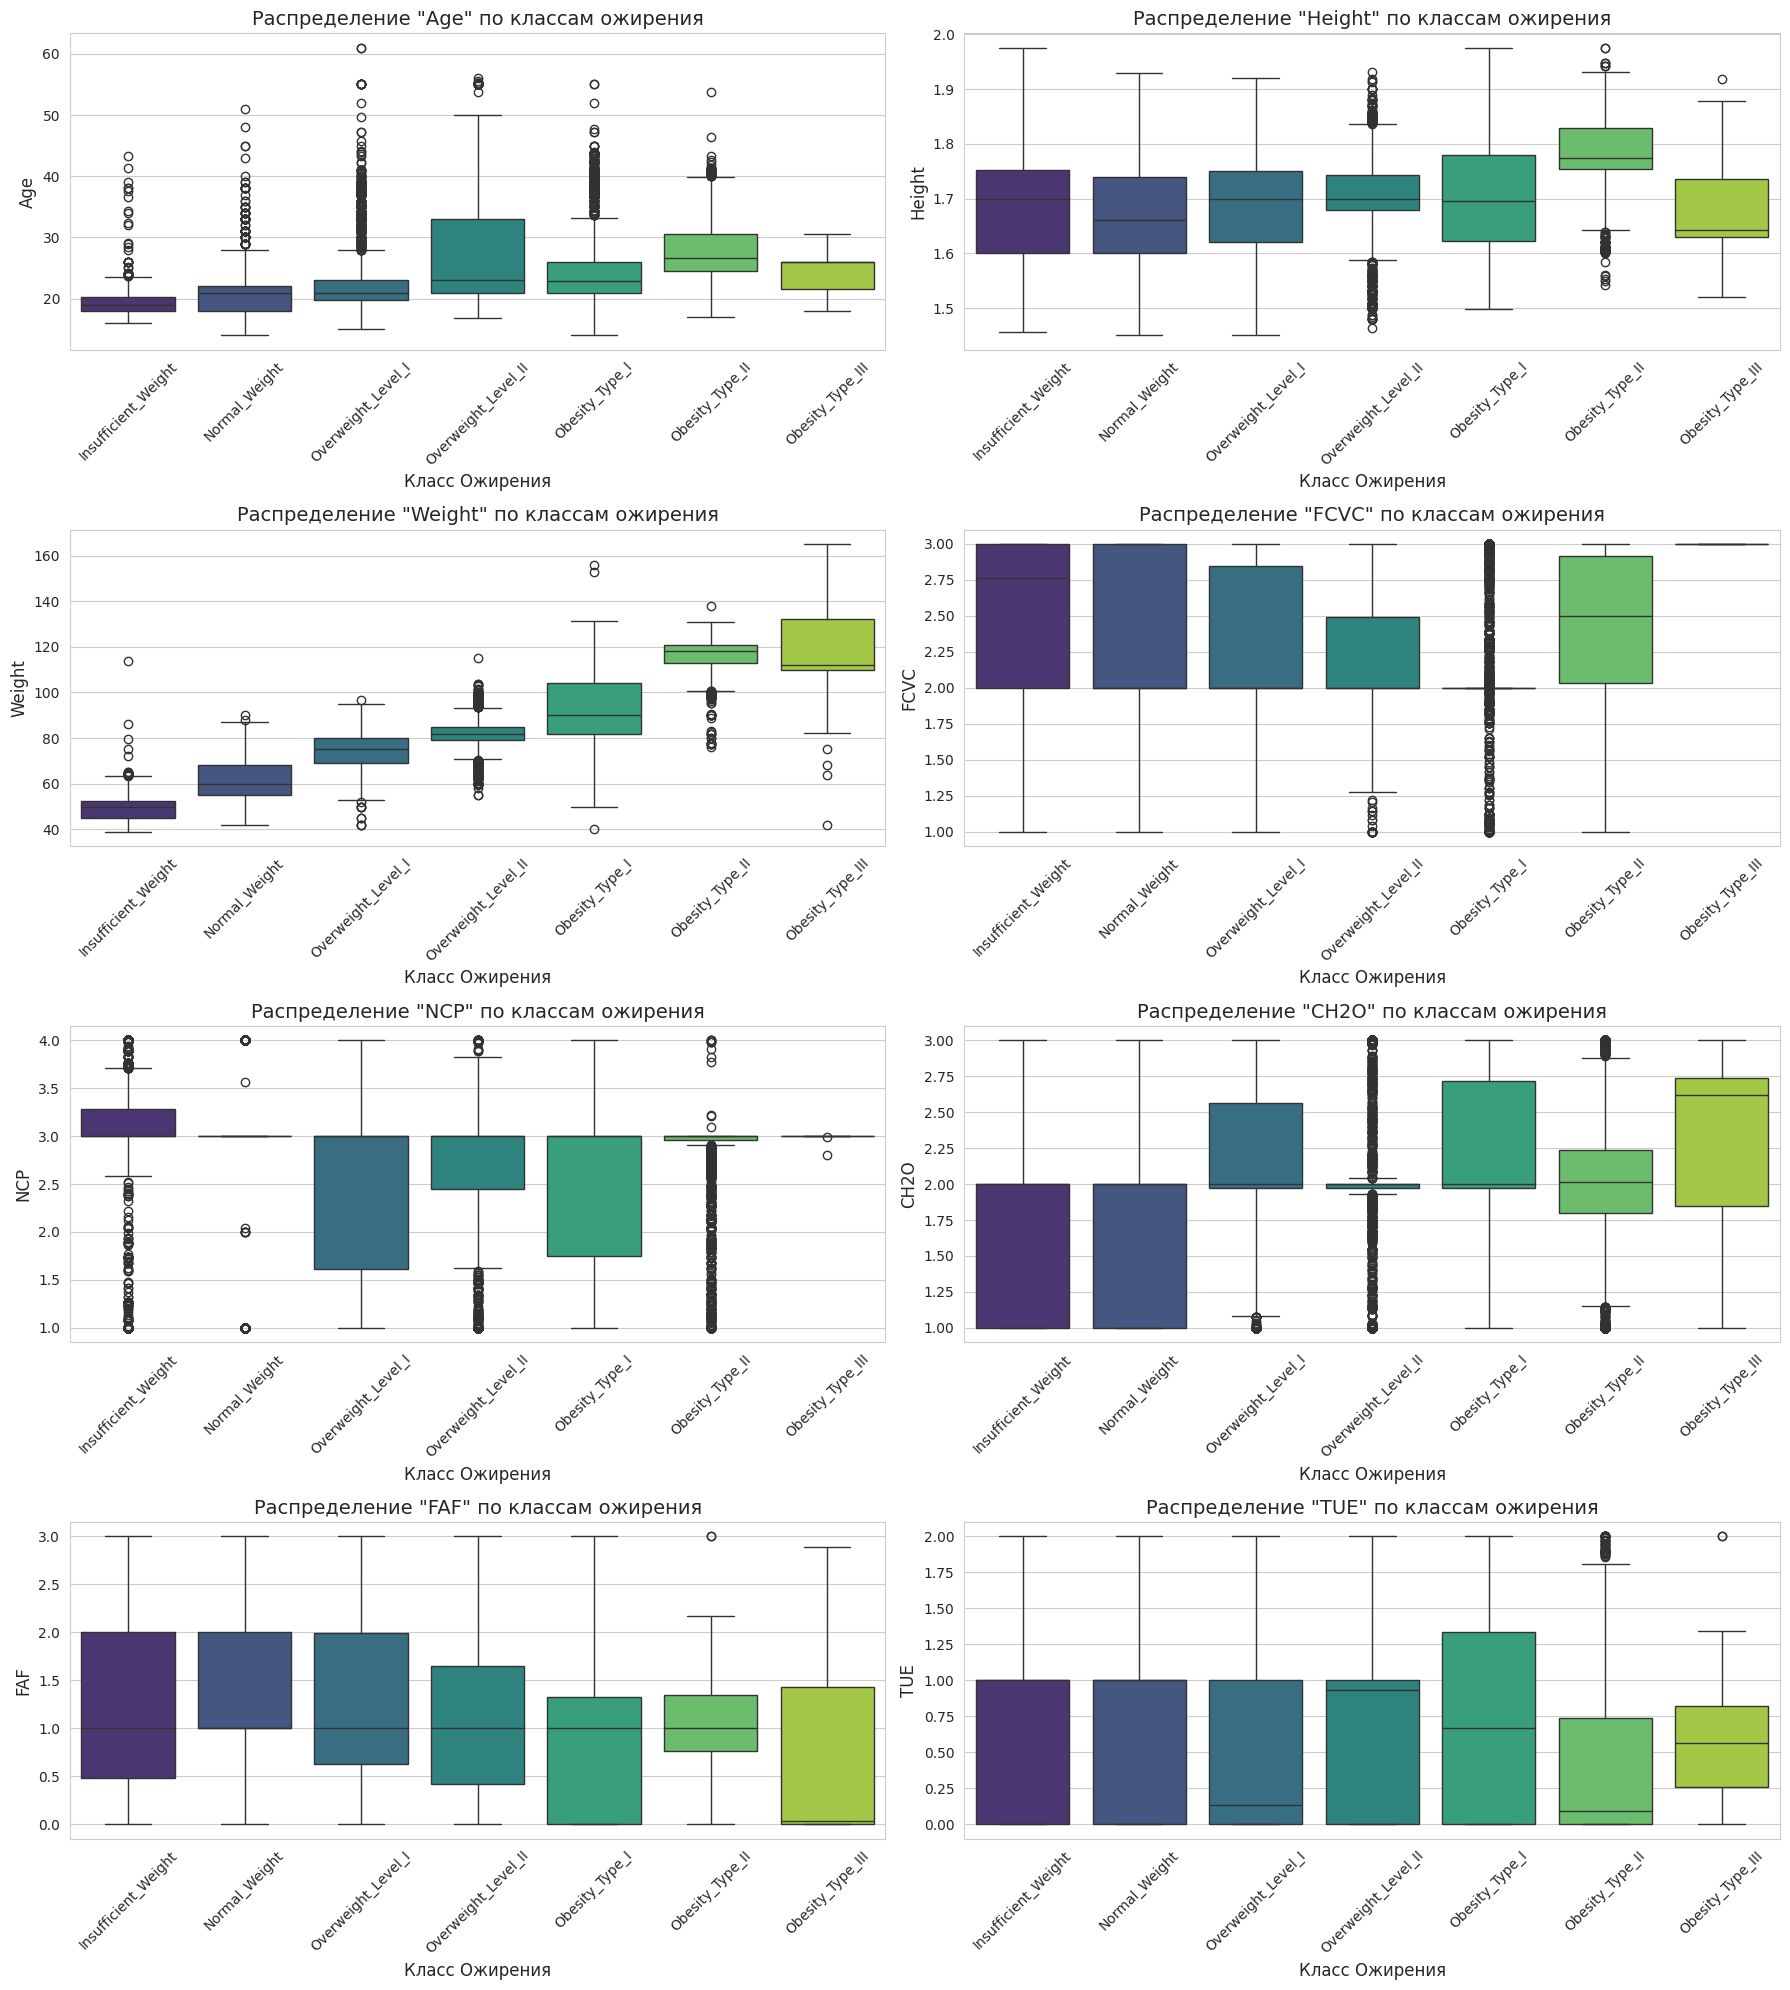

In [10]:
# Настраиваем полотно
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

# Цвета для графиков
palette = sns.color_palette("viridis", n_colors=len(class_order))

for i, col in enumerate(NUMERICAL_FEATURES):
    sns.boxplot(
        x=TARGET,
        y=col,
        data=df_train,
        order=class_order,
        palette=palette,
        ax=axes[i]
    )
    axes[i].set_title(f'Распределение "{col}" по классам ожирения', fontsize=14)
    axes[i].set_xlabel("Класс Ожирения", fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---

# Вывод по влиянию числовых признаков (Box Plots)

Визуальный анализ числовых признаков с помощью Box Plots позволил установить **сильные монотонные тенденции**, которые обеспечивают высокую **разделимость (separability)** классов ожирения. Эти признаки можно разделить на **первичные предикторы** и **поведенческие факторы риска**.

## 1. Первичные и ключевые предикторы

### A. Weight (Вес)

* **Тенденция:** Диаграмма **Weight** демонстрирует почти **идеальную, монотонную зависимость**. Медиана (центральная линия ящика) последовательно и равномерно увеличивается при переходе от `Insufficient_Weight` к `Obesity_Type_III`.
* **Значение для Модели:** **Weight является самым сильным и информативным признаком** в наборе данных. Это ожидаемо, поскольку он является компонентом ИМТ (BMI), но графически подтверждает, что этот признак **превосходно разделяет** все 7 классов.

### Б. Age (Возраст)

* **Тенденция:** Медиана возраста **возрастает** для самых тяжёлых категорий ожирения, особенно `Obesity_Type_II` и `Obesity_Type_III`.
* **Значение для Модели:** Это указывает на то, что **тяжёлые формы ожирения чаще встречаются в старших возрастных группах**. Признак **Age** является значимым модификатором и предиктором, особенно для прогнозирования **крайних классов** ожирения, где кумулятивный эффект факторов риска становится более выраженным.

---

## 2. Поведенческие факторы риска

Анализ поведенческих признаков подтверждает логическую **обратную причинно-следственную связь** между активностью и уровнем ожирения.

### A. FAF (Физическая активность) и TUE (Время у экрана)

* **Тенденция FAF:** Высокая физическая активность (высокие значения FAF) преобладает в **более лёгких классах** (`Normal_Weight`, `Overweight_Level_I`). Медиана FAF заметно **снижается** в классах `Obesity`.
* **Тенденция TUE:** Низкая активность или **высокое время у экрана** (TUE) доминируют в классах ожирения (`Obesity_Type_I`, `Obesity_Type_II`).
* **Значение для Модели:** Эти поведенческие признаки подтверждают свою **релевантность** для классификации ожирения. Они позволяют модели улавливать влияние **малоподвижного образа жизни** как ключевого фактора, способствующего развитию патологических уровней веса.

### Б. Height (Рост) и Диетические признаки

* **Рост (Height):** Медиана роста **стабильна** по всем классам. Рост сам по себе не является сильным предиктором ожирения, но его наличие **критически важно** для следующего этапа — **Feature Engineering (создания BMI)**.
* **Диетические признаки (FCVC, NCP, CH2O):** Эти признаки показывают ожидаемые, но менее выраженные тенденции. Они будут играть **уточняющую роль**, помогая модели более тонко разделять схожие классы в сочетании с более сильными предикторами.

**Итоговый вывод:** Числовые признаки демонстрируют **четкую прогностическую структуру**. **Weight** обеспечивает **массовую разделимость** классов, а **Age** и **поведенческие факторы** (FAF, TUE) служат **уточняющими модификаторами**, необходимыми для повышения точности модели.

## 2\. Анализ Категориальных Признаков (Stacked Bar Plots)

Используем **столбчатые диаграммы (Stacked Bar Plots)** для изучения распределения целевой переменной `NObeyesdad` в зависимости от каждого категориального признака.

### Код для категориального анализа


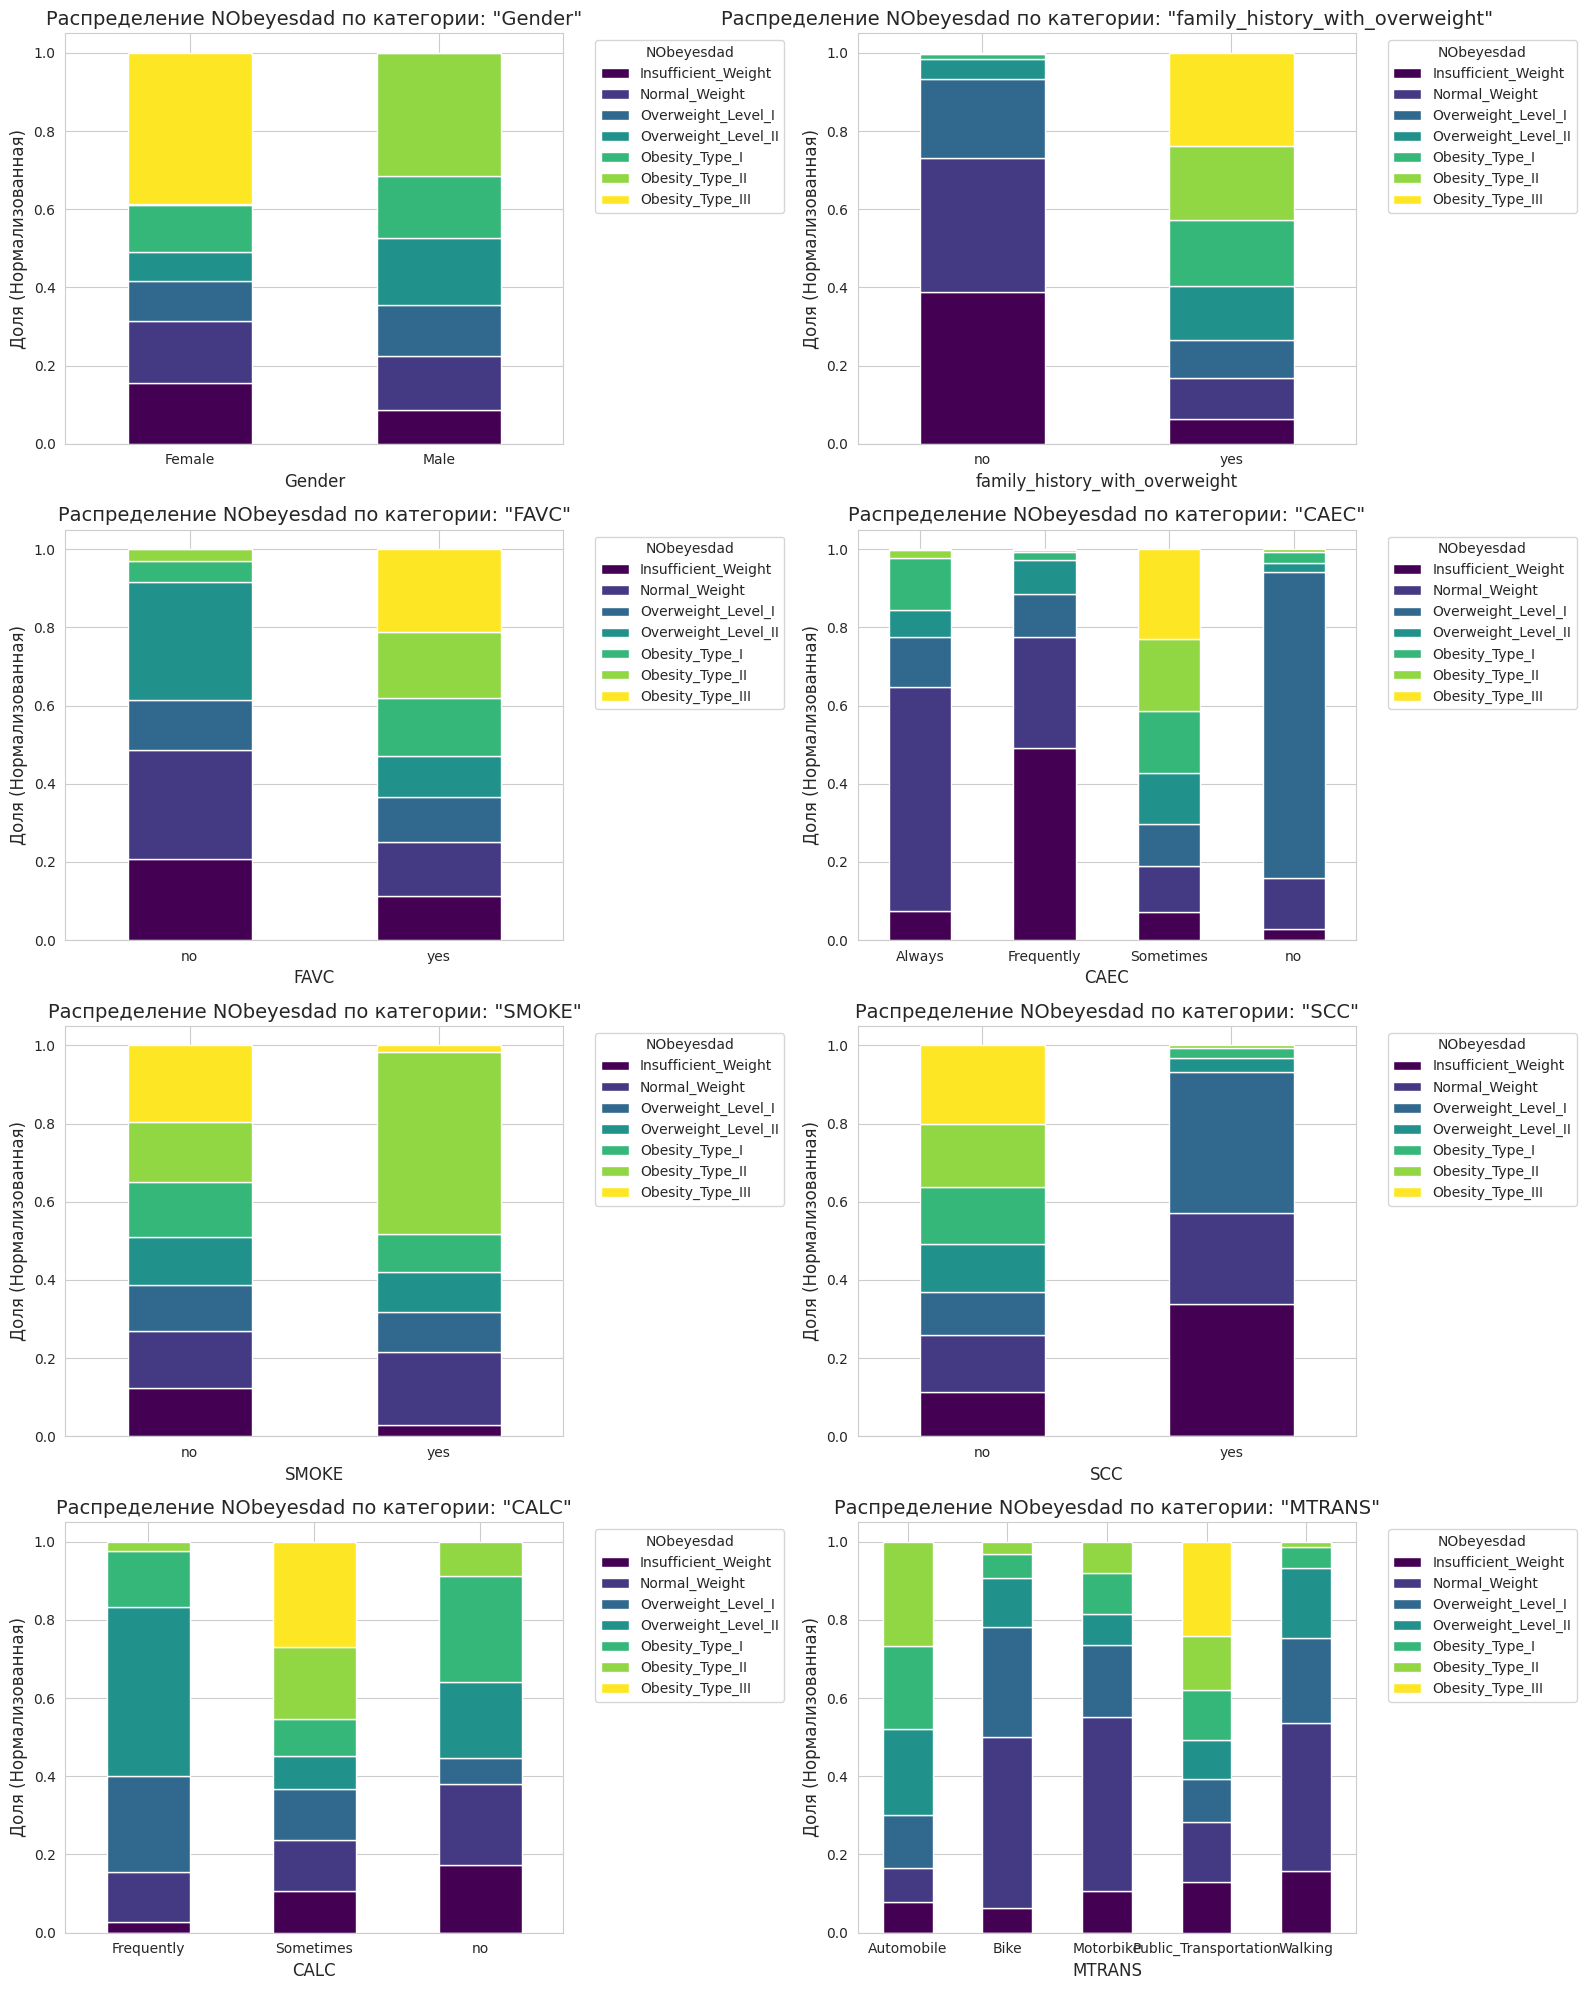

In [8]:
# Настраиваем полотно
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(CATEGORICAL_FEATURES):
    # Создаем кросс-табуляцию и нормализуем, чтобы получить процентное распределение
    cross_tab = pd.crosstab(df_train[col], df_train[TARGET], normalize='index')

    # Сортируем столбцы согласно установленному порядку классов
    cross_tab = cross_tab[class_order]

    cross_tab.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        colormap='viridis'
    )
    axes[i].set_title(f'Распределение NObeyesdad по категории: "{col}"', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Доля (Нормализованная)", fontsize=12)
    axes[i].legend(title=TARGET, bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


# Вывод по влиянию категориальных признаков (Stacked Bar Plots)

Визуализация категориальных признаков с помощью Stacked Bar Plots выявила **резкие и несимметричные сдвиги** в распределении целевой переменной `NObeyesdad`, что доказывает их критическую роль в классификации. Эти признаки можно разделить на **доминирующие факторы риска** и **модификаторы профиля ожирения**.

## 1. Доминирующий фактор риска (Причинность)

### A. family\_history\_with\_overweight (Наследственность)

* **Наблюдение:** В группе с ответом **"yes"** на этот признак сегмент **`Normal_Weight` практически исчезает**, а **совокупная доля всех классов Ожирения (Obesity)** становится подавляющей.
* **Значение для Модели:** Это **критически важный категориальный предиктор**. Наследственность **систематически сдвигает** вероятность набора избыточного веса. Модель должна рассматривать этот признак как один из **самых сильных факторов**, обеспечивающих первичную сепарабельность между здоровым весом и патологическими классами.

---

## 2. Модификаторы и поведенческие триггеры

### A. Gender (Пол)

* **Наблюдение:** Распределение классов **асимметрично по полу**.
    * Среди **Женщин (Female)** наблюдается явное преобладание **самого тяжелого класса, `Obesity_Type_III`**.
    * Среди **Мужчин (Male)** выше доли в промежуточных классах, таких как `Overweight_Level_I` и `Obesity_Type_II`.
* **Значение для Модели:** Пол является **ключевым признаком-модификатором**. Он не просто предсказывает наличие ожирения, а **влияет на его тип и степень тяжести**. Это необходимо учитывать для точной дифференциации самых тяжелых классов.

### Б. MTRANS (Вид транспорта)

* **Наблюдение:** Пользователи **Automobile (Автомобиля)** имеют **значительно более высокую** долю всех классов ожирения (`Obesity_Type_I, II, III`) по сравнению с теми, кто использует `Public_Transportation` или `Walking`.
* **Значение для Модели:** Этот признак **подтверждает связь между малоподвижным образом жизни и риском ожирения**. Он служит мощным поведенческим триггером, дополняя результаты, полученные от числовых признаков `FAF` и `TUE`.

### В. FAVC, CAEC, CALC (Диетические привычки)

* Эти признаки также демонстрируют логичные тенденции (например, увеличение доли ожирения в категориях **частого потребления** высококалорийной пищи (`FAVC` = yes), пищи между приемами и алкоголя). Они служат **дополнительными поведенческими факторами**, которые помогают модели уточнить профиль риска в пределах схожих категорий.

---

**Общий вывод по EDA (Числовые + Категориальные):**

Визуальный анализ четко установил **иерархию прогностической силы**. Наследственность (`family_history_with_overweight`) и физические параметры (`Weight`) являются **основными факторами разделения классов**. Поведенческие факторы (`FAVC`, `MTRANS`, `FAF`) и демографические модификаторы (`Age`, `Gender`) необходимы для **точной настройки и дифференциации** типов ожирения.

Теперь данные готовы к финальной технической обработке.

---

# Итоговое Резюме EDA: Прогноз Ожирения

Исследовательский анализ данных (EDA) был проведен в два этапа: **автоматизированное профилирование** для оценки качества и **целенаправленный визуальный анализ** для установления прогностических связей. Результаты подтвердили высокую информативность данных и выявили четкую иерархию факторов риска.

## 1. Результаты Автоматического Профилирования

Мы начали с автоматического отчёта (`ydata-profiling`), который обеспечил оценку качества данных:

* **Исключительное Качество Данных:** Подтверждено **отсутствие пропущенных значений (0%) и дубликатов** в 20,758 записях. Это означает, что этап очистки данных не требуется, и мы можем сразу перейти к трансформации.
* **Задача Классификации:** Установлено, что это задача **многоклассовой классификации** с 7 категориями `NObeyesdad`. Распределение классов оказалось **примерно равномерным**, что благоприятно для обучения модели (нет доминирующего дисбаланса).
* **Первые Предупреждения:** Обнаружена потенциальная **мультиколлинеарность** между некоторыми признаками (например, `FCVC` и `NCP`), что будет учтено при выборе моделей, чувствительных к этому фактору (например, линейных).

---

## 2. Результаты Детального Визуального Анализа

Целенаправленный визуальный анализ с использованием **Box Plots** (для числовых признаков) и **Stacked Bar Plots** (для категориальных) позволил установить **причинно-следственную иерархию** влияния признаков:

### А. Первичные Факторы Разделения (Мощные Предикторы)

Эти признаки обеспечивают основную сепарабельность классов, демонстрируя сильную монотонную связь с уровнем ожирения:

* **Weight (Вес):** Box Plots показали **почти идеальную, монотонно возрастающую медиану** по мере увеличения класса ожирения. **Weight** является самым сильным числовым предиктором.
* **family\_history\_with\_overweight (Наследственность):** Stacked Bar Plots показали, что при ответе **"yes"**, доля класса `Normal_Weight` **резко снижается**, а доля всех классов `Obesity` доминирует. Это **самый сильный категориальный предиктор**.

### Б. Факторы Рискованного Поведения (Триггеры)

Эти признаки подтверждают, что образ жизни является ключевым триггером развития ожирения:

* **Низкая Активность:** Поведенческие признаки, такие как **FAF** (низкая физическая активность) и **MTRANS** (использование **Automobile**), четко **коррелируют с более тяжёлыми классами** ожирения.
* **Рискованное Питание:** Признак **FAVC** (частое потребление высококалорийной пищи) также демонстрирует **резкий сдвиг** в сторону самых тяжелых классов.

### В. Модификаторы Профиля Ожирения

Эти демографические признаки влияют не столько на факт ожирения, сколько на **тип и тяжесть** его проявления:

* **Age (Возраст):** Медиана возраста **возрастает для тяжёлых категорий** (`Obesity_Type_II` и `Obesity_Type_III`), указывая, что тяжелые формы чаще встречаются в старших возрастных группах.
* **Gender (Пол):** Распределение **асимметрично**. У **Женщин** преобладает самый тяжёлый класс (`Obesity_Type_III`), тогда как у **Мужчин** — промежуточные классы (`Overweight\_Level\_I` и `Obesity\_Type\_II`).

---

## 3. Заключение и Следующие Шаги

**Итоговый вывод:** Данные чисты, информативны и логически обоснованы. EDA выявил четкий путь для построения высокоточной модели, основанный на иерархии признаков.

**Приоритеты (Pre-processing):**

1.  **Feature Engineering:** Создание ключевого признака **Индекса Массы Тела (BMI)** из `Weight` и `Height`.
2.  **Кодирование:** Преобразование **10 категориальных признаков** в числовой формат (One-Hot Encoding для номинальных, Ordinal Encoding для порядковых).
3.  **Масштабирование (Scaling):** Нормализация числовых признаков (`Age`, `Weight`, `BMI`, и др.) для моделей, чувствительных к масштабу.
